In [11]:
#Import required libraries from sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

#Load the data from the file and store in a variable called data
data = pd.read_csv("Housing.csv")

#Print the first 5 rows of the dataframe
print(data.head())

#Convert specified columns to dummy variables
columns_to_dummy = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(data, columns=columns_to_dummy, drop_first=False)
df.head()



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False


In [12]:
df['price'].mean()


4766729.247706422

In [13]:
labels = ["low", "medium", "high"]
num_bins = 3
df['category'] = pd.qcut(df['price'], q=num_bins, labels=labels)

# Define features and target
X = df[['mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = df['category']

#df.columns
x = df.drop(columns=['price', 'category'])
y = df['category']


In [45]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Train the model
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)
max

# Predict the target values for the test set
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6280487804878049

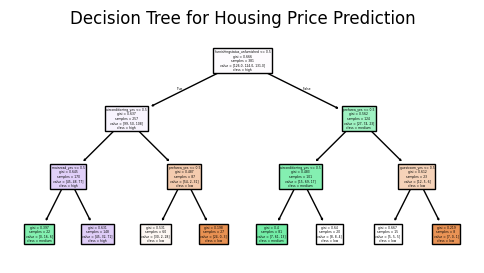

In [34]:
from sklearn.tree import plot_tree

# Plot Decision Tree
plt.figure(figsize=(6, 3))
plot_tree(model, feature_names=X.columns, class_names=["low", "medium", "high"], filled=True)
plt.title("Decision Tree for Housing Price Prediction")
plt.show()

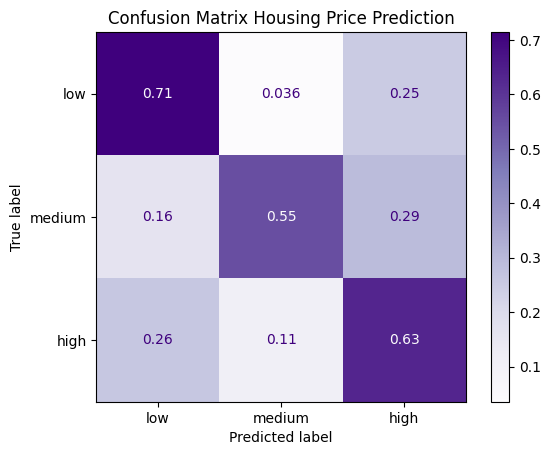

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=labels, cmap=plt.cm.Purples, normalize='true')
plt.title("Confusion Matrix Housing Price Prediction")
plt.show()

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')



Accuracy: 0.6280487804878049
Recall: 0.6280487804878049
Precision: 0.6671495052647705
F1 Score: 0.6331263412751161


In [44]:
#df.columns
x_regressor = df.drop(columns=['price', 'category'])
y_regressor = df['price']

X_train, X_test, y_train, y_test = train_test_split(x_regressor, y_regressor, test_size=0.3, random_state=420)

model = DecisionTreeRegressor(criterion='squared_error', max_depth=3)
model.fit(X_train, y_train)
max

#regressor_model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)
#regressor_model.fit(x_regressor, y_regressor)

<function max>

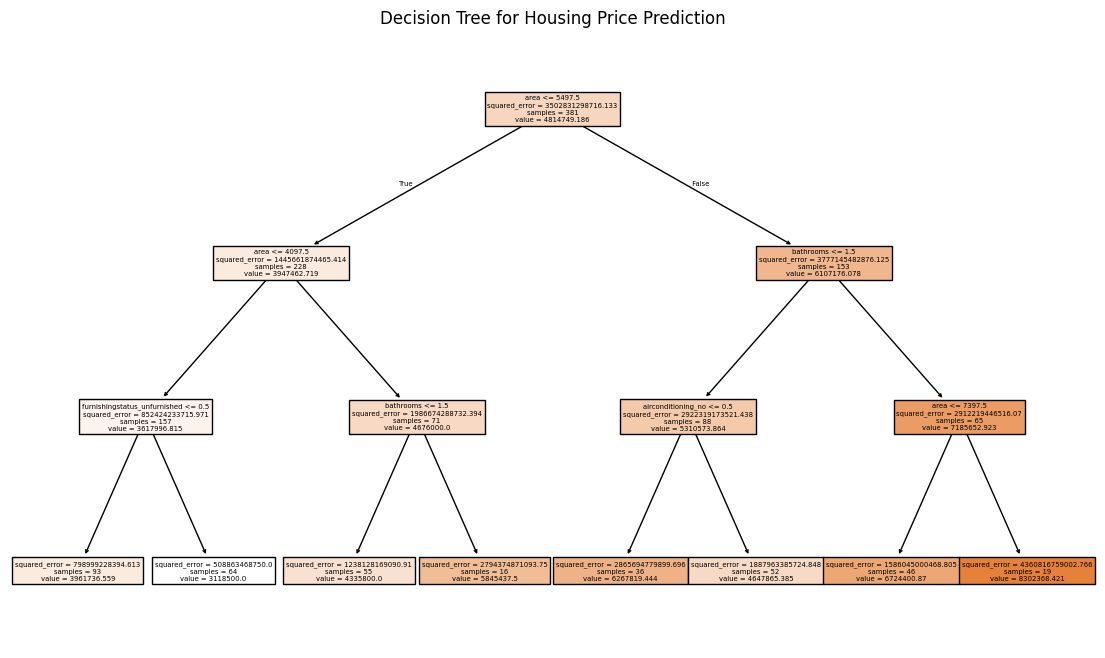

In [41]:
# Plot Decision Tree
plt.figure(figsize=(14, 8))
plot_tree(model, feature_names=x.columns, filled=True)
plt.title("Decision Tree for Housing Price Prediction")
plt.show()

Approach to Data Preprocessing:

We converted categorical features into dummy variables.
Used qcut to categorize house prices into "low," "medium," and "high" for classification.
Dropped price when training the classifier and used it as the target for regression.
Split data into 70% training and 30% testing.

Justification for Model Choices:

Classification: Decision Tree Classifier with max_depth=3 was chosen to prevent overfitting and improve interpretability.
Split Proportion: A 70-30 split ensures sufficient training data while allowing evaluation on unseen data.

Key Insights from Decision Tree Analysis:

The decision tree structure (visualized) helps understand how categorical features impact house price classification.
Performance metrics (accuracy, precision, recall, and F1-score) indicate the effectiveness of classification.
The confusion matrix suggests potential misclassifications.
Regression tree visualization provides insight into price-based splits but lacks performance metrics.